# Decision Trees with sample data

## Include required packages

In [6]:
library(party)
library(partykit)


Attaching package: 'partykit'

The following objects are masked from 'package:party':

    cforest, ctree, ctree_control, edge_simple, mob, mob_control,
    node_barplot, node_bivplot, node_boxplot, node_inner, node_surv,
    node_terminal



## Have a look at the first ten observations of the dataset

In [7]:
print(head(readingSkills))
input.dat <- readingSkills[c(1:105),]

  nativeSpeaker age shoeSize    score
1           yes   5 24.83189 32.29385
2           yes   6 25.95238 36.63105
3            no  11 30.42170 49.60593
4           yes   7 28.66450 40.28456
5           yes  11 31.88207 55.46085
6           yes  10 30.07843 52.83124


## Grow the decision tree

In [8]:
output.tree <- ctree(
 nativeSpeaker ~ age + shoeSize + score,
 data = input.dat)

## Plot the results

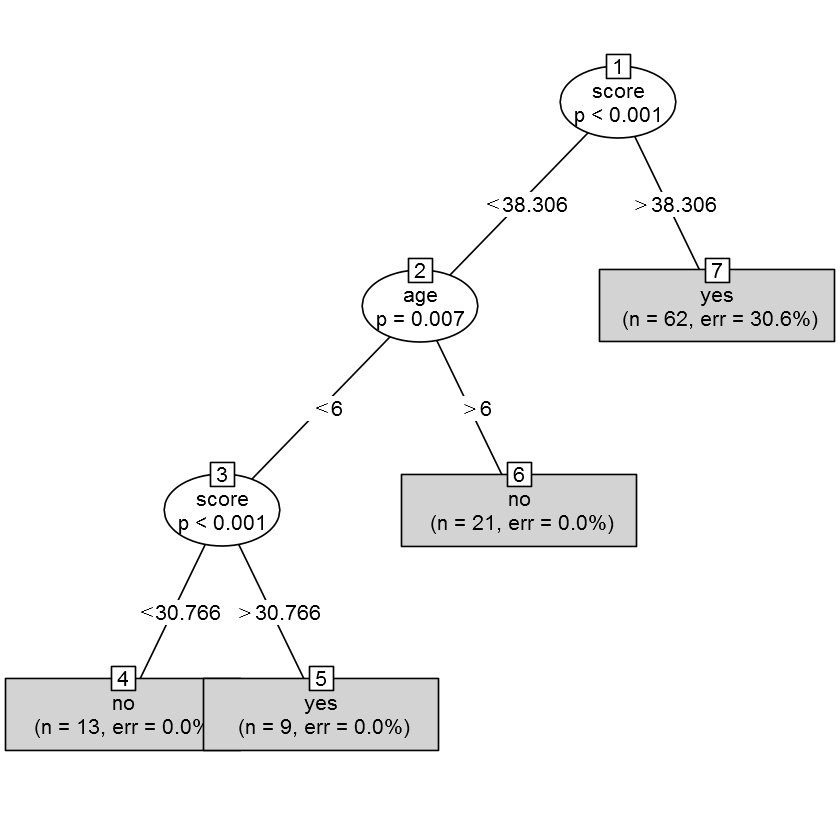

In [9]:
plot(as.simpleparty(output.tree))

# Decision Trees with UCI Machine Learning dataset

## Read data file

In [1]:
mydata <- read.csv("data/Cardiotocographic.csv")
mydata$NSPF <- as.factor(mydata$NSP)

## Decision tree with party

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: sandwich



	 Conditional inference tree with 16 terminal nodes

Response:  NSPF 
Inputs:  LB, AC, FM 
Number of observations:  2126 

1) AC <= 0.000823723; criterion = 1, statistic = 331.671
  2) LB <= 136; criterion = 1, statistic = 164.062
    3) FM <= 0.1351126; criterion = 1, statistic = 34.422
      4) FM <= 0.004110997; criterion = 0.907, statistic = 6.885
        5)*  weights = 415 
      4) FM > 0.004110997
        6) LB <= 124; criterion = 0.977, statistic = 9.686
          7)*  weights = 19 
        6) LB > 124
          8)*  weights = 67 
    3) FM > 0.1351126
      9)*  weights = 11 
  2) LB > 136
    10) LB <= 143; criterion = 0.983, statistic = 10.333
      11)*  weights = 181 
    10) LB > 143
      12)*  weights = 210 
1) AC > 0.000823723
  13) AC <= 0.002053388; criterion = 1, statistic = 70.582
    14) LB <= 136; criterion = 1, statistic = 23.743
      15) FM <= 0.0121396; criterion = 1, statistic = 38.406
        16)*  weights = 127 
      15) FM > 0.0121396
        17)*  weig

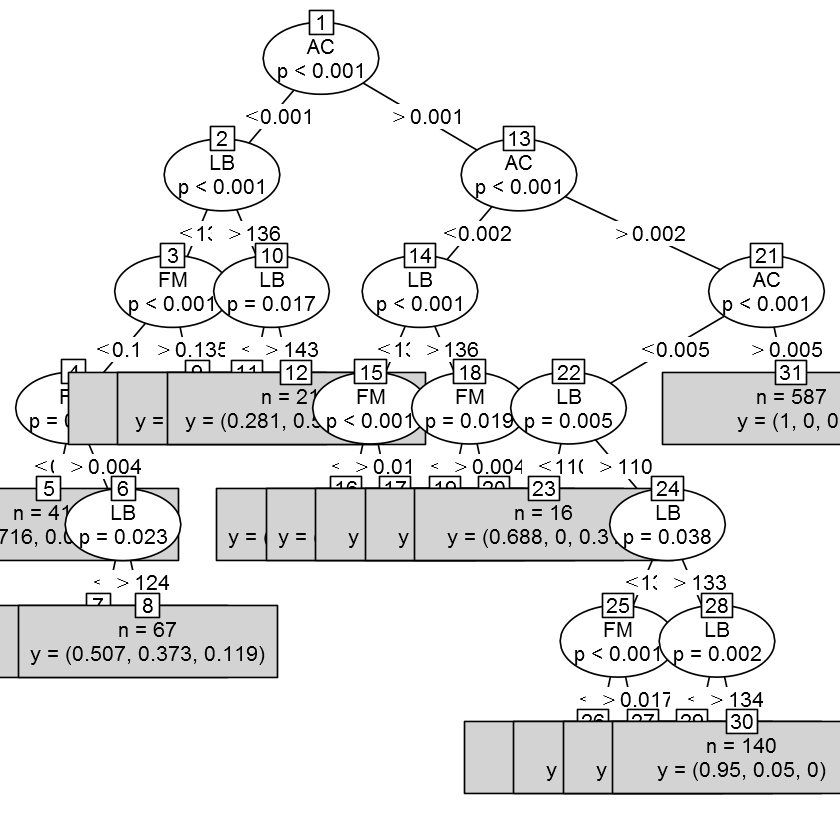

In [2]:
library(party)
mytree <- ctree(NSPF~LB+AC+FM, mydata, controls=ctree_control(mincriterion=0.9, minsplit=50))
print(mytree)
plot(mytree,type="simple")

## Misclassification error

In [3]:
tab<-table(predict(mytree), mydata$NSPF)
print(tab)
1-sum(diag(tab))/sum(tab)

   
       1    2    3
  1 1593  165  138
  2   62  130   27
  3    0    0   11


[1] 0.1843838